# Kaggle - Energy dataset

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing, model_selection, metrics

import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day_of_week
0,40,0,21.00,38.163333,18.500000,40.326667,20.230,38.000000,19.926667,34.526667,...,36.533333,4.63,755.033333,75.333333,4.666667,40.000000,0.60,6.455464,6.455464,Wednesday
1,40,0,21.00,40.450000,18.390000,44.090000,22.000,38.290000,19.856667,38.863333,...,43.163333,6.42,753.433333,97.000000,6.000000,50.833333,5.92,6.797277,6.797277,Friday
2,60,0,24.69,49.476000,24.329730,47.159009,26.834,43.840000,23.997297,46.901351,...,48.400000,17.50,751.533333,82.333333,2.000000,40.000000,14.40,8.524160,8.524160,Sunday
3,40,0,23.79,37.730000,21.633333,39.066667,24.500,38.126667,23.600000,36.663333,...,43.290000,12.00,752.033333,64.666667,1.000000,40.000000,5.47,25.197838,25.197838,Tuesday
4,100,0,23.79,39.326667,28.178000,31.376000,25.100,37.290000,23.600000,37.500000,...,42.760000,18.90,752.466667,52.166667,3.000000,40.000000,8.85,23.039471,23.039471,Tuesday


## Data exploration

In [5]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,98.002838,3.828120,21.684882,40.258743,20.340154,40.422551,22.262874,39.243878,20.847201,39.040304,...,19.481392,41.564688,7.410142,755.535791,79.815677,4.031558,38.336201,3.770643,25.026830,25.026830
std,103.457709,7.983508,1.607712,3.964974,2.194775,4.069910,2.003559,3.248654,2.045689,4.332139,...,2.017567,4.157938,5.327065,7.380735,14.908459,2.438925,11.825196,4.200420,14.496293,14.496293
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.596667,17.200000,28.766667,15.100000,28.424286,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.760000,37.363333,18.790000,37.900000,20.790000,36.900000,19.500000,35.566667,...,18.000000,38.518000,3.600000,750.933333,70.333333,2.000000,29.000000,0.900000,12.511717,12.511717
50%,60.000000,0.000000,21.600000,39.633333,20.000000,40.500000,22.100000,38.560000,20.600000,38.430000,...,19.390000,40.900000,6.900000,756.100000,84.000000,3.666667,40.000000,3.430000,24.930300,24.930300
75%,100.000000,0.000000,22.600000,43.060000,21.500000,43.290000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.363333,10.400000,760.966667,91.666667,5.333333,40.000000,6.580000,37.660334,37.660334
max,1080.000000,70.000000,26.260000,57.423333,29.856667,54.766667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.283333,100.000000,14.000000,66.000000,15.400000,49.996530,49.996530


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14801 entries, 0 to 14800
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   14801 non-null  int64  
 1   lights       14801 non-null  int64  
 2   T1           14801 non-null  float64
 3   RH_1         14801 non-null  float64
 4   T2           14801 non-null  float64
 5   RH_2         14801 non-null  float64
 6   T3           14801 non-null  float64
 7   RH_3         14801 non-null  float64
 8   T4           14801 non-null  float64
 9   RH_4         14801 non-null  float64
 10  T5           14801 non-null  float64
 11  RH_5         14801 non-null  float64
 12  T6           14801 non-null  float64
 13  RH_6         14801 non-null  float64
 14  T7           14801 non-null  float64
 15  RH_7         14801 non-null  float64
 16  T8           14801 non-null  float64
 17  RH_8         14801 non-null  float64
 18  T9           14801 non-null  float64
 19  RH_9

In [7]:
#Number of null values in all columns
data.isnull().sum().sort_values(ascending = True)

Appliances     0
rv1            0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
rv2            0
T7             0
T6             0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
RH_6           0
Day_of_week    0
dtype: int64

#### Conversion des données catégorielles en chiffres 

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["Day_of_week"] = encoder.fit_transform(data["Day_of_week"])

#### Drop de la variable lights inutile

In [9]:
data = data.drop(["lights"], axis=1)

#### Visualisations

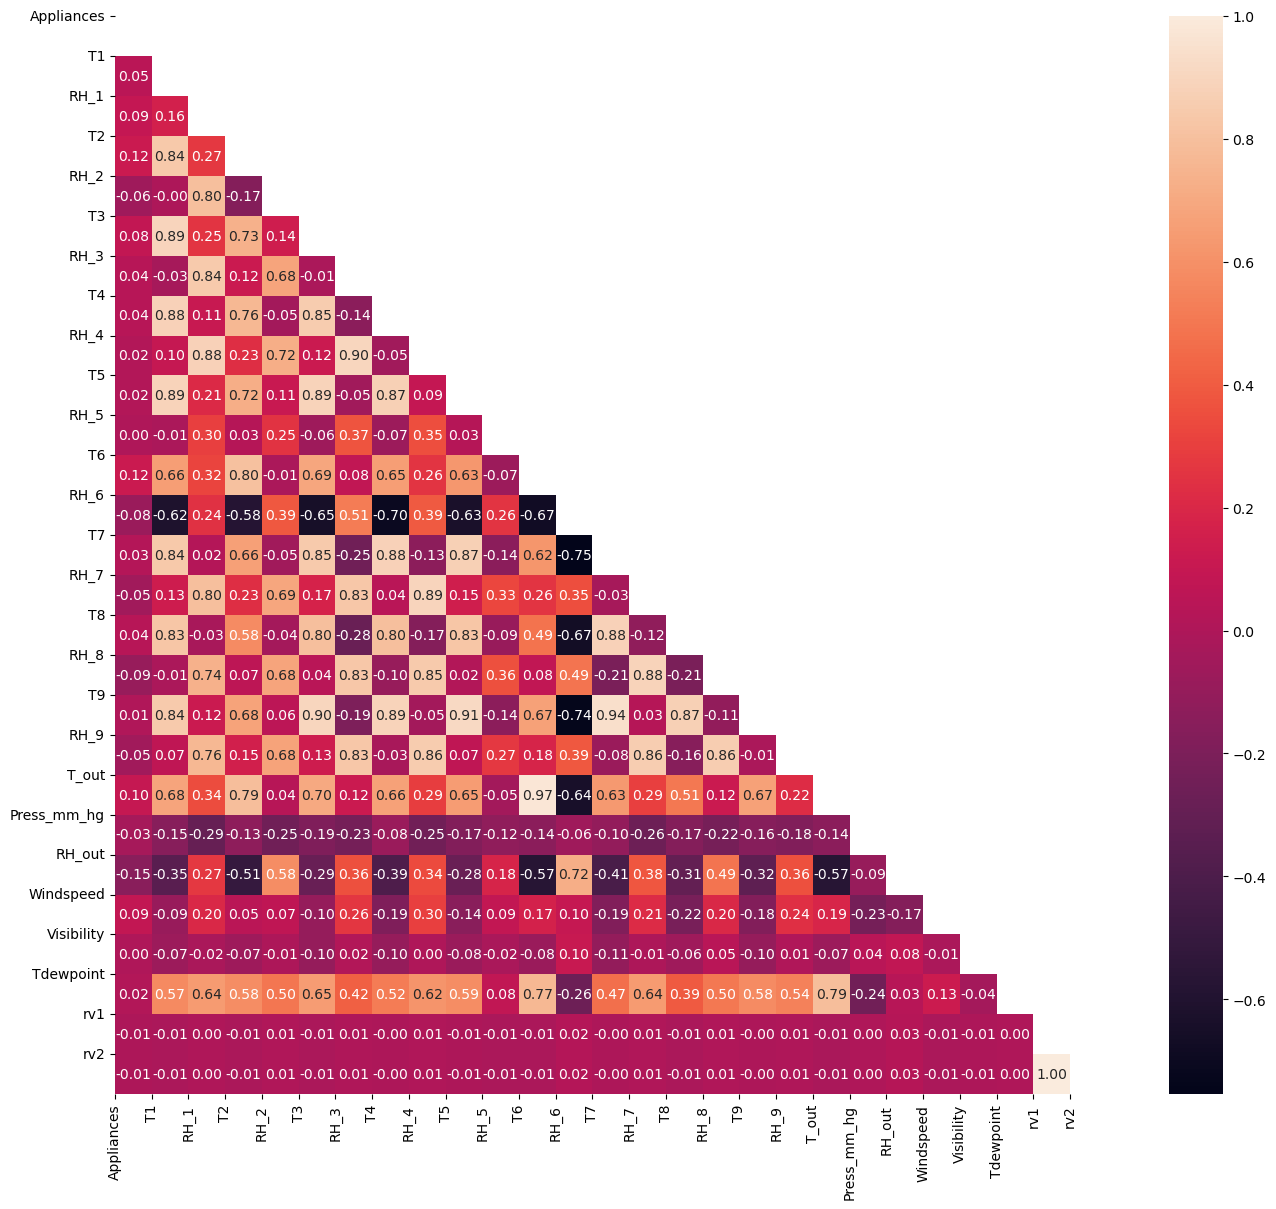

In [10]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = data.drop(['Day_of_week'], axis=1)
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [11]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1    rv2          1.000000
T6     T_out        0.974985
T7     T9           0.944683
T5     T9           0.910924
T3     T9           0.902327
RH_3   RH_4         0.899665
RH_4   RH_7         0.894385
T1     T3           0.892386
T4     T9           0.890157
T3     T5           0.888455
T1     T5           0.885910
RH_7   RH_8         0.883725
T7     T8           0.882703
RH_1   RH_4         0.880386
T4     T7           0.878383
T1     T4           0.877274
T4     T5           0.872505
T5     T7           0.870636
T8     T9           0.869874
RH_7   RH_9         0.858151
RH_8   RH_9         0.856419
RH_4   RH_9         0.856063
T3     T4           0.853219
       T7           0.848788
RH_4   RH_8         0.848108
RH_1   RH_3         0.844879
T1     T9           0.844449
       T7           0.839018
       T2           0.836712
RH_3   RH_9         0.834587
       RH_7         0.834040
       RH_8         0.831325
T1     T8           0.827216
T5     T8        

In [12]:
data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'Day_of_week'],
      dtype='object')

# Pre processing

#### Séparation en dataset de train et test et isolation de la target

In [13]:
from sklearn.model_selection import train_test_split

# 75% of the data is usedfor the training of the models and the rest is used for testing
train_data, test_data = train_test_split(data,test_size=0.25,random_state=40)

In [14]:
train_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day_of_week
1189,50,22.890000,41.590000,20.200000,45.126667,24.600000,38.700000,21.290000,41.700000,21.175000,...,40.333333,8.73,753.866667,80.666667,3.0,40.0,5.63,24.572602,24.572602,6
13690,100,21.390000,40.730000,18.790000,45.000000,22.390000,37.966667,20.263333,40.626667,19.790000,...,42.090000,8.90,739.100000,83.000000,12.0,40.0,6.20,9.382576,9.382576,1
2983,60,23.892208,40.437403,22.818701,40.410390,24.948052,38.475974,23.682208,39.453247,21.322468,...,42.097186,8.87,757.000000,95.000000,1.0,48.0,8.17,7.969307,7.969307,4
14187,30,22.500000,45.560000,21.890000,43.200000,22.500000,45.290000,20.323333,47.900000,18.710000,...,48.863333,9.00,758.100000,87.000000,6.0,40.0,7.00,23.933729,23.933729,1
8466,70,21.790000,42.730000,19.100000,46.466667,23.100000,39.790000,21.700000,40.163333,20.852500,...,44.900000,6.50,751.600000,93.000000,1.0,40.0,5.40,11.189903,11.189903,3


In [15]:
target = 'Appliances'

In [42]:
def preprocessing(df):
    X = df.drop([target], axis=1)
    y = df[target]
    
    return X,y

In [43]:
X_train, y_train = preprocessing(train_data)
X_test, y_test = preprocessing(test_data)

In [44]:
X_train.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day_of_week
1189,22.890000,41.590000,20.200000,45.126667,24.600000,38.700000,21.290000,41.700000,21.175000,53.647500,...,40.333333,8.73,753.866667,80.666667,3.0,40.0,5.63,24.572602,24.572602,6
13690,21.390000,40.730000,18.790000,45.000000,22.390000,37.966667,20.263333,40.626667,19.790000,47.500000,...,42.090000,8.90,739.100000,83.000000,12.0,40.0,6.20,9.382576,9.382576,1
2983,23.892208,40.437403,22.818701,40.410390,24.948052,38.475974,23.682208,39.453247,21.322468,50.518019,...,42.097186,8.87,757.000000,95.000000,1.0,48.0,8.17,7.969307,7.969307,4
14187,22.500000,45.560000,21.890000,43.200000,22.500000,45.290000,20.323333,47.900000,18.710000,55.950000,...,48.863333,9.00,758.100000,87.000000,6.0,40.0,7.00,23.933729,23.933729,1
8466,21.790000,42.730000,19.100000,46.466667,23.100000,39.790000,21.700000,40.163333,20.852500,45.296250,...,44.900000,6.50,751.600000,93.000000,1.0,40.0,5.40,11.189903,11.189903,3


#### Normalisation avec StandardScaler()

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler().fit(X_train)
print(scaler.mean_)

[ 21.68051409  40.23132338  20.32786676  40.41342199  22.2584877
  39.22852988  20.84589297  39.0219034   19.57957845  50.91695304
   7.87550536  54.7656252   20.2542631   35.38843295  22.02450074
  42.95927488  19.47636611  41.56151233   7.39408081 755.62269141
  79.8680527    4.03323931  38.26788038   3.76918491  25.05073413
  25.05073413   2.95468468]


In [21]:
X_train = scaler.transform(X_train)

# Machine learning models 

In [25]:
#pip install xgboost

In [26]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

#### Comparaison of the different models

In [27]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [28]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [29]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.024508,0.132222,-65.575003,884.325112
1,Ridge:,0.016017,0.150873,-63.250048,868.746537
2,KNeighborsRegressor:,0.000000,0.558062,-0.353913,126.110651
3,SVR:,5.732175,-0.010038,-0.053715,111.254571
4,RandomForest,17.202532,0.930677,-2.925105,214.724710
5,ExtraTreeRegressor :,4.544047,1.000000,-0.734311,142.731514
6,GradientBoostingRegressor:,4.376606,0.344863,-21.764943,517.117990
7,XGBRegressor:,0.648615,0.879678,-25.046238,553.132096
8,MLPRegressor:,7.261649,0.421665,-33761.626110,19914.732144


### Parameter Tuning 

#### 1. Best parameters

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [31]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200}

In [32]:
#Calcul du RMSE pour ce modèle avec les meilleurs parametres
np.sqrt(mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)))

123.61899779748667

#### 2. Best features

In [33]:
# Get sorted list of features in order of importance
feature_indices = np.argsort(grid_search.best_estimator_.feature_importances_)

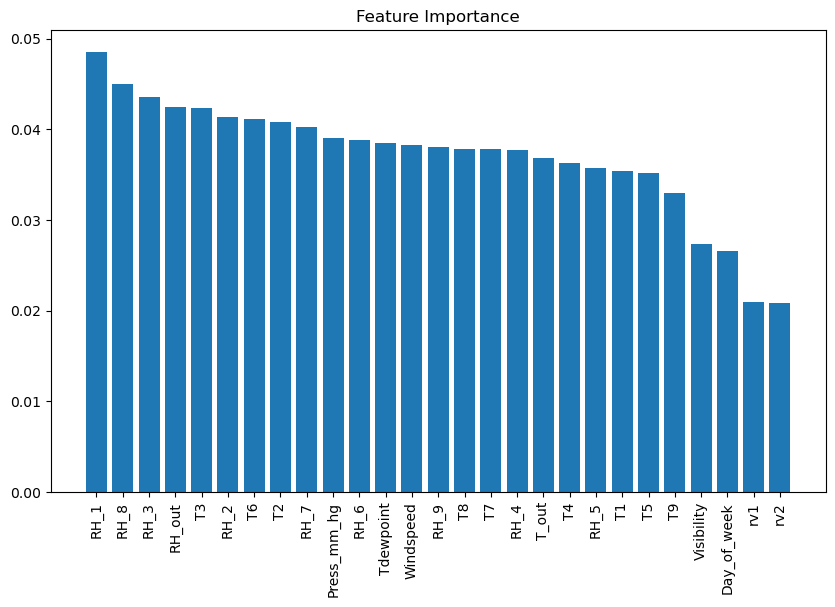

In [45]:
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices]
# Create plot
plt.figure(figsize=(10,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [46]:
# Get top 20 most important feature 
names[0:22]

['RH_1',
 'RH_8',
 'RH_3',
 'RH_out',
 'T3',
 'RH_2',
 'T6',
 'T2',
 'RH_7',
 'Press_mm_hg',
 'RH_6',
 'Tdewpoint',
 'Windspeed',
 'RH_9',
 'T8',
 'T7',
 'RH_4',
 'T_out',
 'T4',
 'RH_5',
 'T1',
 'T5']

In [47]:
# Get 5 least important feature 
names[-5:]

['T9', 'Visibility', 'Day_of_week', 'rv1', 'rv2']

In [48]:
# Reduce test & training set to 5 feature set
train_5F = X_train[names[0:22]]
test_5F = X_test[names[0:22]]

In [49]:
train_5F.head()

,RH_1,RH_8,RH_3,RH_out,T3,RH_2,T6,T2,RH_7,Press_mm_hg,...,Windspeed,RH_9,T8,T7,RH_4,T_out,T4,RH_5,T1,T5
1189,41.590000,39.693333,38.700000,80.666667,24.600000,45.126667,7.030000,20.200000,34.933333,753.866667,...,3.0,40.333333,23.500000,21.790000,41.700000,8.73,21.290000,53.647500,22.890000,21.175000
13690,40.730000,44.400000,37.966667,83.000000,22.390000,45.000000,8.895000,18.790000,39.090000,739.100000,...,12.0,42.090000,22.760000,21.230000,40.626667,8.90,20.263333,47.500000,21.390000,19.790000
2983,40.437403,42.810714,38.475974,95.000000,24.948052,40.410390,14.050866,22.818701,37.836364,757.000000,...,1.0,42.097186,23.975974,23.261688,39.453247,8.87,23.682208,50.518019,23.892208,21.322468
14187,45.560000,51.891111,45.290000,87.000000,22.500000,43.200000,9.033333,21.890000,43.220000,758.100000,...,6.0,48.863333,20.969444,18.600000,47.900000,9.00,20.323333,55.950000,22.500000,18.710000
8466,42.730000,43.272000,39.790000,93.000000,23.100000,46.466667,6.463333,19.100000,35.700000,751.600000,...,1.0,44.900000,22.434000,21.500000,40.163333,6.50,21.700000,45.296250,21.790000,20.852500


In [50]:
# Clone the Gridsearch model with his parameter and fit on reduced dataset

from sklearn.base import clone
cloned_model = clone(grid_search.best_estimator_)
cloned_model.fit(train_5F , y_train)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=200,
                    random_state=40)

In [51]:
# Reduced dataset scores 

print('Training set R2 Score - ', metrics.r2_score(y_train,cloned_model.predict(train_5F)))
print('Testing set R2 Score - ', metrics.r2_score(y_test,cloned_model.predict(test_5F)))
print('Testing set RMSE Score - ', np.sqrt(mean_squared_error(y_test, cloned_model.predict(test_5F))))

Training set R2 Score -  0.9999990643126436
Testing set R2 Score -  0.5611150138289435
Testing set RMSE Score -  71.80120319934609


# Conclusion

Best RMSE Score -  71.80120319934609 (22 best param, ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40))

#### We train this model with the full train dataset

In [122]:
#Creation of the full train dataset with the 22 best features + Appliances
train_full = data[['Appliances', 'RH_1',
 'RH_8',
 'RH_3',
 'RH_out',
 'T3',
 'T6',
 'RH_2',
 'T2',
 'RH_7',
 'Press_mm_hg',
 'RH_6',
 'Tdewpoint',
 'T8',
 'RH_9',
 'Windspeed',
 'T7',
 'RH_4',
 'T_out',
 'T4',
 'RH_5',
 'T1',
 'T5']]
train_full.head()

,Appliances,RH_1,RH_8,RH_3,RH_out,T3,T6,RH_2,T2,RH_7,...,T8,RH_9,Windspeed,T7,RH_4,T_out,T4,RH_5,T1,T5
0,40,38.163333,38.550000,38.000000,75.333333,20.230,5.000000,40.326667,18.500000,32.126667,...,20.890,36.533333,4.666667,18.323333,34.526667,4.63,19.926667,44.800000,21.00,18.730000
1,40,40.450000,43.526667,38.290000,97.000000,22.000,6.690000,44.090000,18.390000,38.656667,...,21.790,43.163333,6.000000,20.230000,38.863333,6.42,19.856667,49.530000,21.00,19.323333
2,60,49.476000,51.220000,43.840000,82.333333,26.834,22.394595,47.159009,24.329730,43.877973,...,24.416,48.400000,2.000000,23.886486,46.901351,17.50,23.997297,52.576622,24.69,22.927027
3,40,37.730000,43.200000,38.126667,64.666667,24.500,10.625714,39.066667,21.633333,34.090000,...,23.700,43.290000,1.000000,22.790000,36.663333,12.00,23.600000,48.126667,23.79,21.100000
4,100,39.326667,42.363333,37.290000,52.166667,25.100,23.730000,31.376000,28.178000,34.897500,...,23.600,42.760000,3.000000,22.790000,37.500000,18.90,23.600000,82.030000,23.79,22.693333


In [123]:
X_train_full, y_train_full = preprocessing(train_full)

In [124]:
#Standardization
scaler2 = StandardScaler().fit(X_train_full)
print(scaler2.mean_)


[ 40.25874339  42.95179187  39.24387778  79.8156774   22.2628739
   7.90221296  40.42255095  20.3401535   35.40349554 755.53579099
  54.71484136   3.7706434   22.02627245  41.56468822   4.03155782
  20.26140938  39.04030368   7.41014163  20.84720107  50.93821698
  21.68488204  19.58890735]


In [125]:
X_train_full = scaler2.transform(X_train_full)
X_train_full

array([[-0.52849795, -0.84236118, -0.3829031 , ..., -0.68260175,
        -0.42601243, -0.46507048],
       [ 0.04823816,  0.11001252, -0.29363235, ..., -0.15660107,
        -0.42601243, -0.14379972],
       [ 2.32474842,  1.58226871,  1.41482506, ...,  0.18219914,
         1.86925269,  1.80748356],
       ...,
       [-1.14979239, -0.23955264, -0.50911347, ..., -1.15277741,
        -0.8676488 , -0.58960802],
       [-1.18510276, -0.66534597, -0.72151628, ..., -0.53303073,
         0.0653858 , -0.83326843],
       [-0.63779196,  0.13265771, -0.81694363, ..., -0.92836528,
        -0.22489164, -0.21058072]])

#### Applying the model to the real  test dataset

In [126]:
test = pd.read_csv('test.csv')
test.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Day_of_week
0,0,20.890000,35.400000,17.760000,39.163333,20.290000,36.900000,19.760000,34.200000,18.600000,...,39.03,1.770,768.90,88.333333,2.333333,63.000000,0.00,25.622221,25.622221,Monday
1,10,21.890000,53.100000,21.290000,45.360000,21.633333,49.226667,20.533333,40.966667,17.677778,...,44.20,2.700,754.60,90.000000,3.000000,27.000000,1.20,23.474485,23.474485,Saturday
2,0,21.390000,35.500000,17.633333,40.530000,21.666667,35.200000,20.290000,33.760000,19.600000,...,38.29,0.200,766.20,83.000000,2.000000,65.000000,-2.40,0.143368,0.143368,Tuesday
3,0,21.390000,41.033333,23.890000,34.840000,22.033333,36.933333,22.390000,35.236000,19.633333,...,38.56,8.850,767.80,70.833333,5.166667,40.000000,3.72,10.293451,10.293451,Wednesday
4,0,19.963333,35.126667,16.463333,40.126667,20.000000,36.400000,19.260000,34.966667,17.890000,...,40.70,-0.467,769.65,93.333333,4.000000,48.833333,-1.45,10.754162,10.754162,Sunday


In [128]:
test["Day_of_week"] = encoder.fit_transform(test["Day_of_week"])

In [131]:
test_final = test[[ 'RH_1',
 'RH_8',
 'RH_3',
 'RH_out',
 'T3',
 'T6',
 'RH_2',
 'T2',
 'RH_7',
 'Press_mm_hg',
 'RH_6',
 'Tdewpoint',
 'T8',
 'RH_9',
 'Windspeed',
 'T7',
 'RH_4',
 'T_out',
 'T4',
 'RH_5',
 'T1',
 'T5']]
test_final.head()

,RH_1,RH_8,RH_3,RH_out,T3,T6,RH_2,T2,RH_7,Press_mm_hg,...,T8,RH_9,Windspeed,T7,RH_4,T_out,T4,RH_5,T1,T5
0,35.400000,39.747500,36.900000,88.333333,20.290000,1.198571,39.163333,17.760000,33.663333,768.90,...,23.068750,39.03,2.333333,21.60,34.200000,1.770,19.760000,51.290000,20.890000,18.600000
1,53.100000,47.563333,49.226667,90.000000,21.633333,2.530000,45.360000,21.290000,39.345000,754.60,...,20.616667,44.20,3.000000,16.89,40.966667,2.700,20.533333,58.204444,21.890000,17.677778
2,35.500000,39.626667,35.200000,83.000000,21.666667,-0.266667,40.530000,17.633333,27.290000,766.20,...,22.100000,38.29,2.000000,20.79,33.760000,0.200,20.290000,40.290000,21.390000,19.600000
3,41.033333,38.090000,36.933333,70.833333,22.033333,11.160000,34.840000,23.890000,30.390000,767.80,...,21.200000,38.56,5.166667,20.05,35.236000,8.850,22.390000,43.266667,21.390000,19.633333
4,35.126667,39.590000,36.400000,93.333333,20.000000,-0.733333,40.126667,16.463333,34.060000,769.65,...,22.100000,40.70,4.000000,20.39,34.966667,-0.467,19.260000,49.000000,19.963333,17.890000


In [138]:
final_model = ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [142]:
final_model.fit(X_train_full, y_train_full)

ExtraTreesRegressor(max_depth=80, max_features='sqrt', n_estimators=250,
                    random_state=40)

In [143]:
predictions = final_model.predict(test_final)
predictions

array([ 56.92, 108.08,  49.6 , ..., 135.16, 124.92, 155.04])

In [145]:
to_be_submitted = pd.DataFrame({"id": test.index+1, "Appliances": predictions})
to_be_submitted.to_csv("to_be_submitted2.csv", index=False)
